## Car Price Prediction using randomforest

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [6]:
# check the missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_dataset=df[['Year','Selling_Price','Present_Price','Fuel_Type','Seller_Type','Transmission','Owner']]

In [10]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,Diesel,Dealer,Manual,0


In [11]:
final_dataset['Current_Year']=2021

c:\users\lalith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,Diesel,Dealer,Manual,0,2021


In [13]:
final_dataset['no_year'] = final_dataset['Current_Year']-final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,Diesel,Dealer,Manual,0,2021,7


In [15]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,Diesel,Dealer,Manual,0,2021,7


In [17]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,Petrol,Dealer,Manual,0,7
1,4.75,9.54,Diesel,Dealer,Manual,0,8
2,7.25,9.85,Petrol,Dealer,Manual,0,4
3,2.85,4.15,Petrol,Dealer,Manual,0,10
4,4.60,6.87,Diesel,Dealer,Manual,0,7


In [19]:
### Convert categral features using dummis
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,0,7,0,1,0,1
1,4.75,9.54,0,8,1,0,0,1
2,7.25,9.85,0,4,0,1,0,1
3,2.85,4.15,0,10,0,1,0,1
4,4.60,6.87,0,7,1,0,0,1


In [21]:
final_dataset.corr()

,Selling_Price,Present_Price,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Owner,-0.088344,0.008057,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [22]:
import seaborn as sns

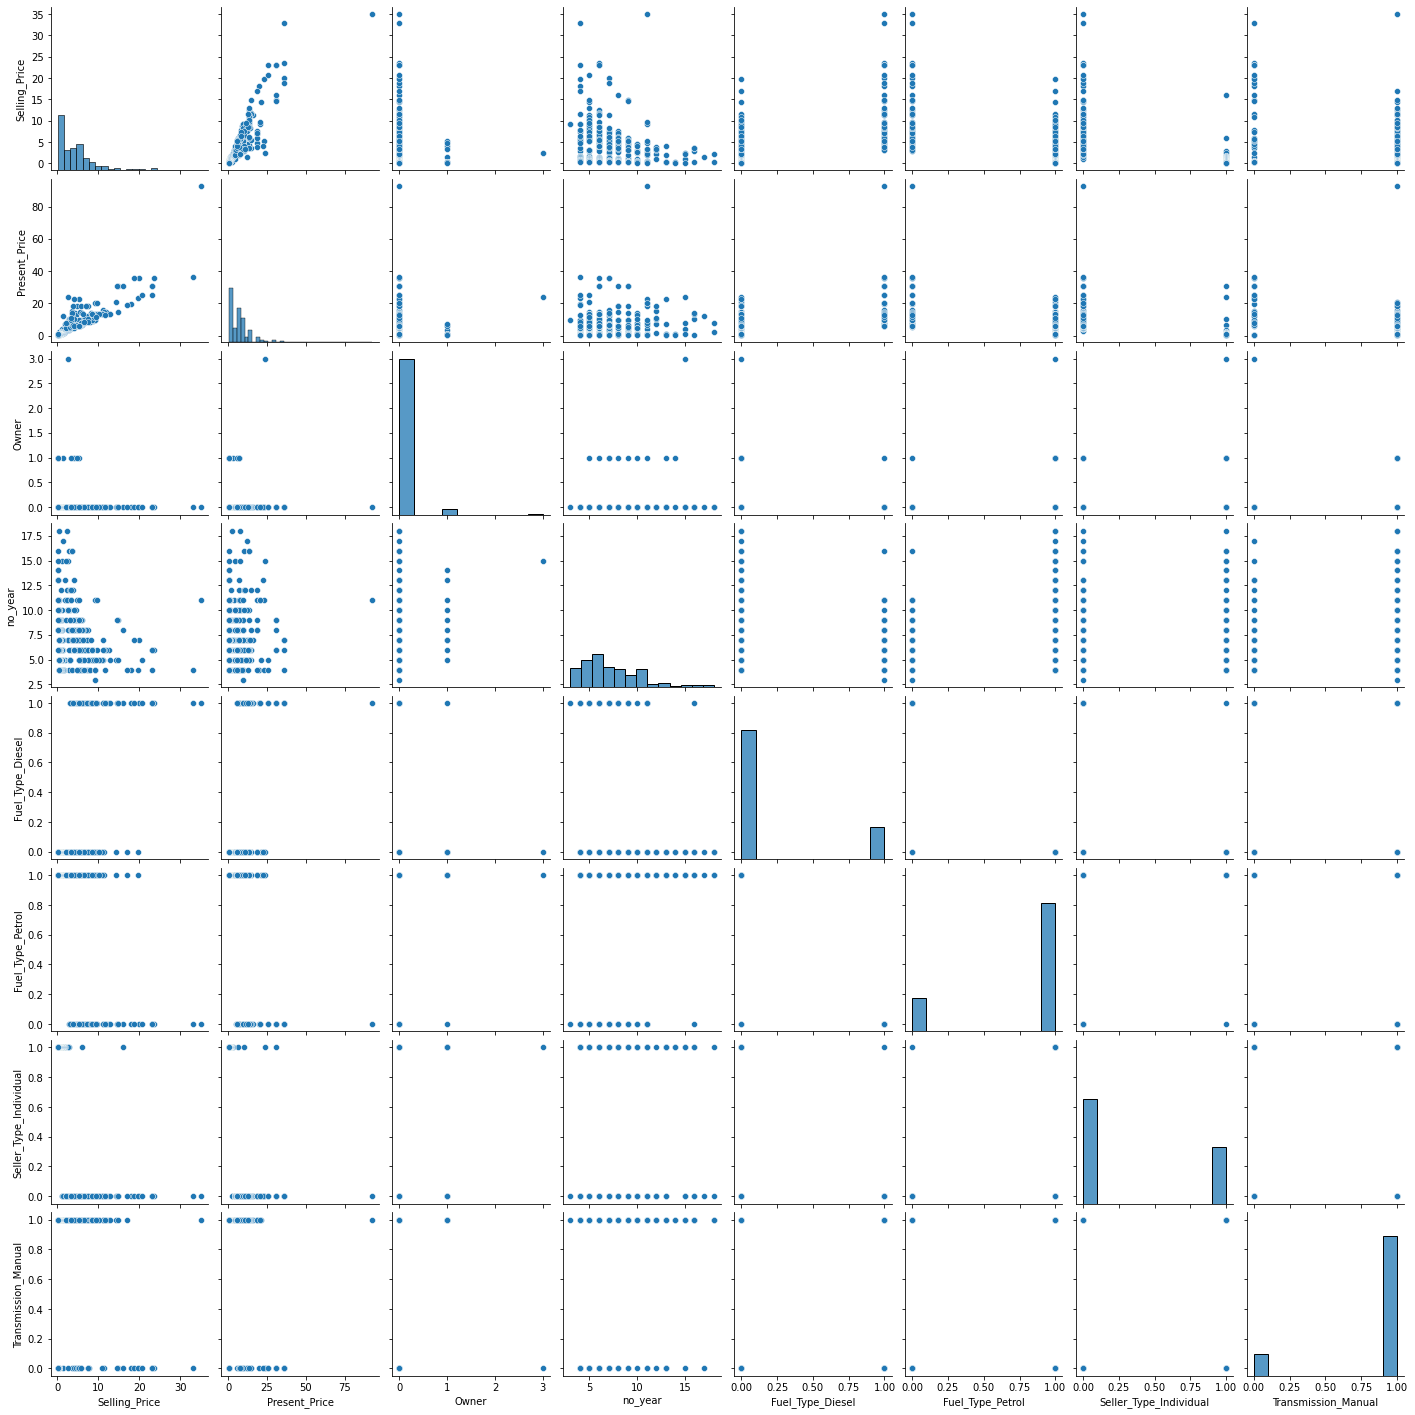

In [23]:
sns.pairplot(final_dataset)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

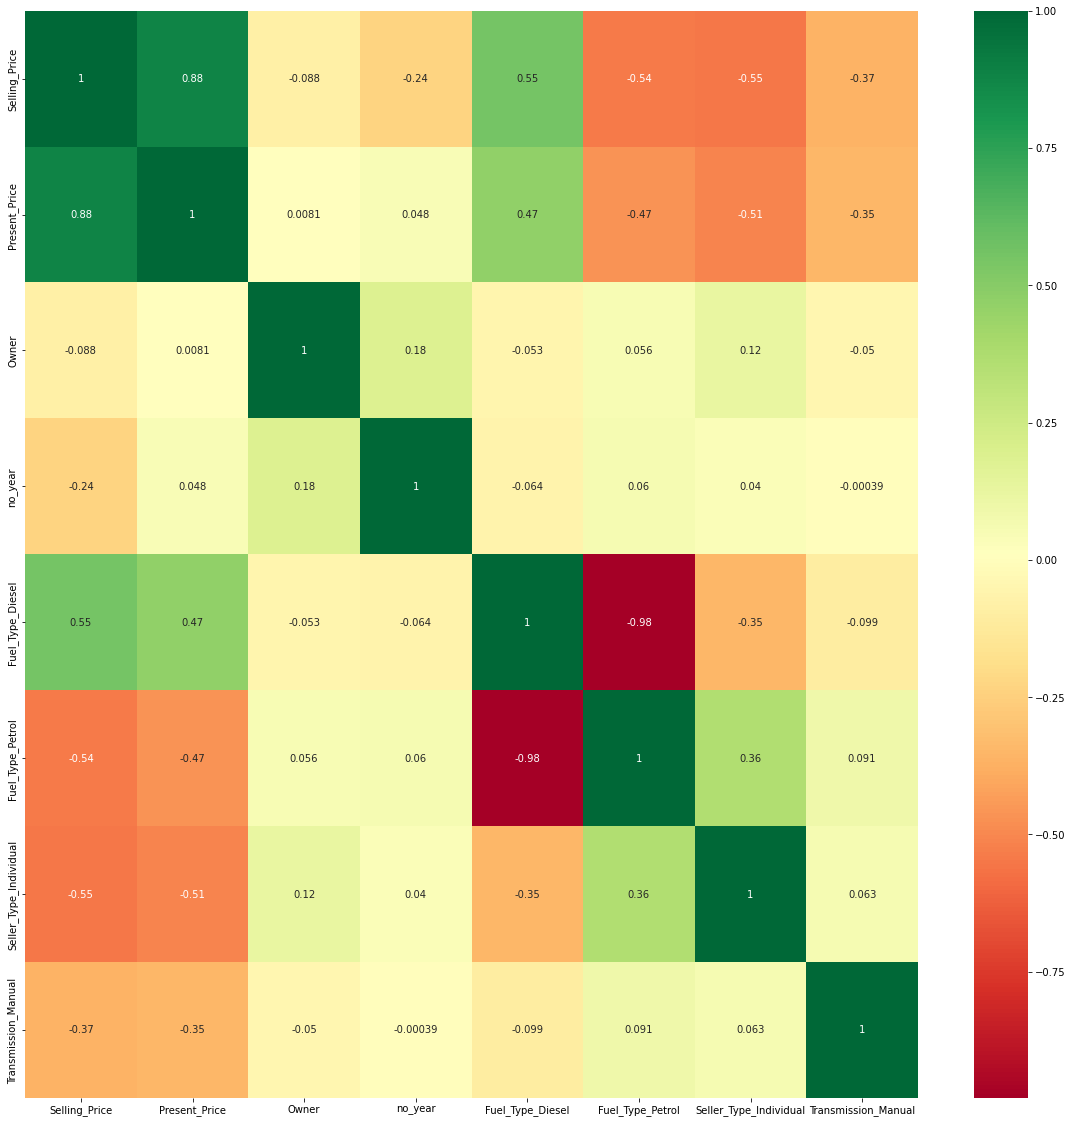

In [25]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot the heatmap
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
final_dataset.head()

,Selling_Price,Present_Price,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,0,7,0,1,0,1
1,4.75,9.54,0,8,1,0,0,1
2,7.25,9.85,0,4,0,1,0,1
3,2.85,4.15,0,10,0,1,0,1
4,4.60,6.87,0,7,1,0,0,1


In [27]:
#independent and dependent features
X = final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]

In [28]:
X.head()

,Present_Price,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,0,7,0,1,0,1
1,9.54,0,8,1,0,0,1
2,9.85,0,4,0,1,0,1
3,4.15,0,10,0,1,0,1
4,6.87,0,7,1,0,0,1


In [29]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [30]:
###Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [31]:
print(model.feature_importances_)

[0.39485489 0.00058541 0.10554147 0.22617204 0.01850885 0.11472728
 0.13961007]


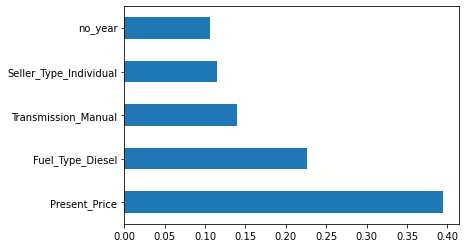

In [32]:
## plot the graph of feature importance for better visuvalization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [34]:
X_train.shape

(240, 7)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_random= RandomForestRegressor()

In [36]:
###Hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [37]:
from sklearn.model_selection import RandomizedSearchCV

#It finds the best parameters it has tobe present

In [38]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [39]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [41]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=1)

In [42]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
predictions=rf_random.predict(X_test)

In [44]:
predictions

array([ 0.40567067,  0.41858622,  5.64450728,  2.98584953,  0.24522383,
        1.15768201,  5.34255739,  3.5463208 ,  6.09719033,  0.47838448,
        1.23064539, 10.28831977,  6.95064805,  1.25232076,  7.14075793,
        0.4194349 ,  0.47775775,  0.48294826, 21.43264177,  3.01341296,
       14.1714769 ,  0.42114303,  0.40460144,  0.27804954,  0.69048972,
        1.94849668,  2.66124496,  5.7309668 ,  0.56391303,  0.68927095,
        9.93279629,  4.84044597,  0.41569182, 21.24082631, 11.05500247,
        4.15521473,  2.47966057,  0.38656632,  2.98536561,  0.24522383,
        2.91900349,  7.85330563,  7.43070825,  4.85883263,  0.22590845,
        4.63110688,  5.27680766,  9.99503692,  3.21612151,  7.30470221,
        4.64340375, 20.50709561,  2.86127392,  8.80596514,  0.48294826,
        0.41569182,  1.25232076,  4.04423179, 17.66331545, 11.24496348,
        0.57972461])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

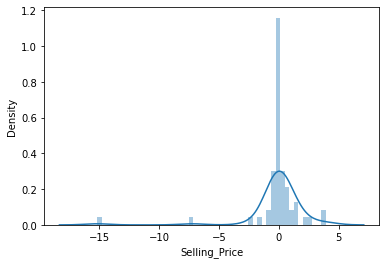

In [47]:
sns.distplot(Y_test-predictions)

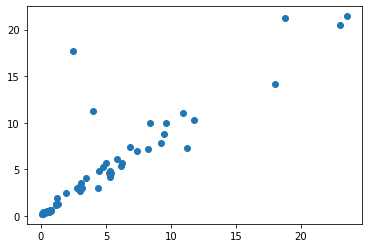

In [48]:
plt.scatter(Y_test,predictions)

In [51]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,predictions)
score

0.8038702317956082

In [48]:
errors = abs(predictions - Y_test)

In [49]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.72 degrees.


In [50]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)

In [51]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 73.85 %.


In [47]:
import pickle
# open a file where you have to store a data
file = open('random_forest_regression_model.pkl','wb')

#Dump the information to that file
pickle.dump(rf_random,file)